In [1]:
from skimage.color import rgb2hsv
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl
import cv2

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\abels\\Desktop\\crowd_count'

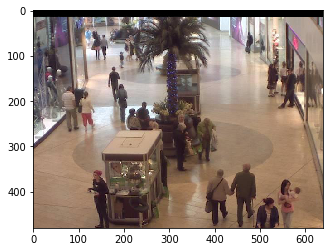

In [3]:
# Load the image
pic_ = plt.imread(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\frames\seq_000001.jpg')

# Display the image
plt.imshow(pic_)
plt.show()

In [4]:
target = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\labels\labels.npy')

In [5]:
max_target = max(list(target))

In [6]:
images_ = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\np_frames\images.npy')

In [7]:
images_.shape

(2000, 480, 640, 3)

In [8]:
datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [10]:
for x in range(0,100):
    datagen.fit(images_[x*20:x*20+20])
    generated_images_ = datagen.flow(images_[x*20:x*20+20], y=target[x*20:x*20+20], batch_size=20)
    images_ = np.append(images_, generated_images_[0][0].astype(np.uint8), axis=0)
    target = np.append(target, generated_images_[0][1])

In [11]:
images_.shape

(4000, 480, 640, 3)

In [15]:
len(images_)

4000

In [13]:
target.shape

(4000,)

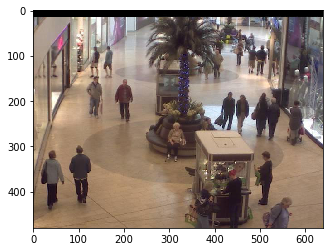

In [12]:
plt.imshow((images_[2250]))
plt.show()

In [16]:
input_data = np.zeros(shape=(len(images_),480,640,3), dtype = int)

In [17]:
%%time
for x in range(0,len(images_)):
    input_data[x] = cv2.cvtColor(images_[x], cv2.COLOR_BGR2HSV)

Wall time: 1min 27s


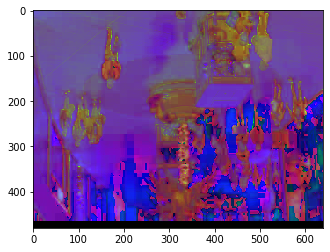

In [20]:
plt.imshow(input_data[2000])
plt.show()

In [21]:
print("%d bytes" % (input_data.size * input_data.itemsize))

14745600000 bytes


In [22]:
input_data[:,:,:,2].size

1228800000

In [23]:
inputlayer_ = input_data[:,:,:,2]

In [24]:
np.save('input_data.npy', inputlayer_)
np.save('target.npy', target)